# DefineBathymetryBasins

This jupyter-notebook is used to show how ExoCcycle classes, functions, and methods are used to generate carbon cycle bathymetry properties
given a created bathymetry model

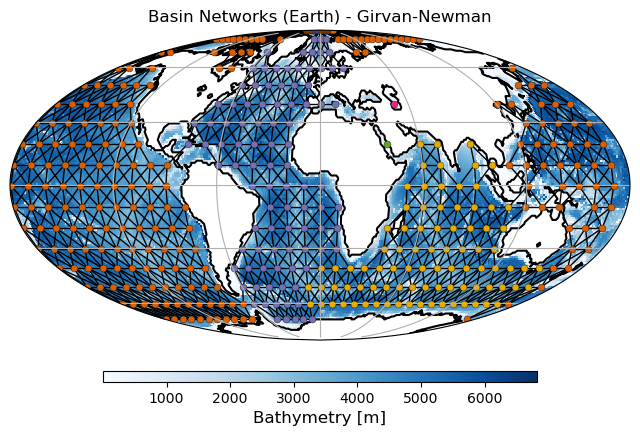

In [ ]:
# Import necessary libraries
import ExoCcycle as EC
import os
import matplotlib as mpl
import numpy as np


# Initial basin definition class
body = ["Earth", "Mars", "Venus", "Moon"]
body = body[0]
basins = EC.utils.Basins(dataDir=os.getcwd()+"/bathymetries/{}".format(body),
                         filename="{}_resampled_1deg.nc".format(body),
                         body=body);

# Define basins based on user input boundaries
basins.defineBasins(minBasinCnt = 3,
                    reducedRes={"on":True,"factor":10},
                    read=False,
                    write=True,
                    verbose=False)

# Plot resulting basins with bathymetry and connections
# Note that periodic connections are not graphically shown,
# but are represented in the node network.
blues_cm = mpl.colormaps['Blues'].resampled(100)
basins.visualize_communities(cmapOpts={"cmap":blues_cm,
                                       "cbar-title":"cbar-title",
                                       "cbar-range":[np.nanmin(np.nanmin(basins.bathymetry)),
                                                     np.nanmean(basins.bathymetry)+2*np.nanstd(basins.bathymetry)]},
                             pltOpts={"valueType": "Bathymetry",
                                      "valueUnits": "m",
                                      "plotTitle":"{}".format(basins.body),
                                      "plotZeroContour":True,
                                      "nodesize":5,
                                      "connectorlinewidth":1},
                             draw={"nodes":True,
                                   "connectors":True,
                                   "bathymetry":True,
                                   "coastlines":True,
                                   "gridlines":True},
                             saveSVG=False,
                             savePNG=True)



In [ ]:
# Define basins based on user input boundaries
basins.defineBasins(minBasinCnt = 3,
                    reducedRes={"on":True,"factor":10},
                    read=True,
                    write=True,
                    verbose=False)

# Plot resulting basins with bathymetry and connections
# Note that periodic connections are not graphically shown,
# but are represented in the node network.
blues_cm = mpl.colormaps['Blues'].resampled(100)
basins.visualize_communities(cmapOpts={"cmap":blues_cm,
                                       "cbar-title":"cbar-title",
                                       "cbar-range":[np.nanmin(np.nanmin(basins.bathymetry)),
                                                     np.nanmean(basins.bathymetry)+2*np.nanstd(basins.bathymetry)]},
                             pltOpts={"valueType": "Bathymetry",
                                      "valueUnits": "m",
                                      "plotTitle":"{}".format(basins.body),
                                      "plotZeroContour":True,
                                      "nodesize":5,
                                      "connectorlinewidth":1},
                             draw={"nodes":True,
                                   "connectors":True,
                                   "bathymetry":True,
                                   "coastlines":True,
                                   "gridlines":True},
                             saveSVG=False,
                             savePNG=False)
